# **(ADD THE NOTEBOOK NAME HERE)**

---

<h2 style='color:#35AED7;'>Objectives</h2>

- Load and preprocess the Chocolate dataset.
- Clean the dataset by removing columns not required,standardise date column,normalise and convert columns where needed.
- Perform exploratory data analysis (EDA) to understand data distribution and relationships.



<h2 style='color:#35AED7;'>Inputs</h2>

- **Dataset:** kagglehub.dataset_download("atharvasoundankar/chocolate-sales")
- **Required Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly
- **Columns of Interest:**
  

<h2 style='color:#35AED7;'>Outputs</h2>

- **Cleaned dataset:** Processed dataset stored as a CSV file for analysis (`df_cleaned.csv`).
- **Exploratory Data Analysis (EDA):**
  - Distribution of heart failure risk across demographics.
  - Observing the distribution or features like Age, RestingBP, and Cholesterol.
  - Identify outliers in numerical data.
  - Compare categorical variables with the target variable.
- **Feature-engineered dataset:** Enhanced dataset with new derived features.
- **Insights & Summary Reports:** Key findings documented for further decision-making.

<h2 style='color:#35AED7;'>Additional Comments</h2>

- Ensure proper handling of missing, duplicated and outlier values to maintain data integrity.
- Perform bias detection to identify imbalances in demographic representation.




# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [7]:
import os
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/Chocolate-Sales-Analysis'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [8]:
os.chdir(os.path.dirname('/Users/hafeezahfagbo/Chocolate-Sales-Analysis/'  ))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [9]:
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/Chocolate-Sales-Analysis'

<h2 style='color:#35AED7;'>Importing Libraries and Packages</h2>

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

---

<h2 style='color:#35AED7;'> Extract</h2>

Loading the CSV dataset containing the data collected previously and extracting it into dataframe using pd.read_csv() function

---

In [13]:
df = pd.read_csv(os.path.join(current_dir, "Inputs", "Chocolate Sales.csv"))
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


<h2 style='color:#35AED7;'> Transform</h2>

* Cleaning the data:

Removal of personal names,converting the amount column to numeric, standadize the date,normalise the column names and check for missing values.

In [14]:
# Drop (Sales Person) Column
df_cleaned = df.drop(columns=["Sales Person"], errors="ignore")


In [15]:
# Convert Amount column to numeric by removing the "$" sign
df_cleaned["Amount"] = df_cleaned["Amount"].replace('[\$,]', '', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/5w/h15_hs_x2dqcp2vlqtmrxlqm0000gn/T/ipykernel_29251/970674774.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_cleaned["Amount"] = df_cleaned["Amount"].replace('[\$,]', '', regex=True).astype(float)


In [16]:
# Convert Date column to standard format (YYYY-MM-DD)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], format="%d-%b-%y", errors="coerce")


In [17]:
# Normalize column names (lowercase, replace spaces with underscores)
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(" ", "_")


In [18]:
# Check for missing values
print("Missing Values:\n", df_cleaned.isnull().sum())
print(df_cleaned.head())

Missing Values:
 country          0
product          0
date             0
amount           0
boxes_shipped    0
dtype: int64
     country              product       date   amount  boxes_shipped
0         UK      Mint Chip Choco 2022-01-04   5320.0            180
1      India        85% Dark Bars 2022-08-01   7896.0             94
2      India  Peanut Butter Cubes 2022-07-07   4501.0             91
3  Australia  Peanut Butter Cubes 2022-04-27  12726.0            342
4         UK  Peanut Butter Cubes 2022-02-24  13685.0            184


The data has been cleaned and ready to load. This will be saved into a csv file for further analysis

<h2 style='color:#35AED7;'> Load</h2>

In [19]:
# Save the cleaned dataset to a CSV file
df_cleaned.to_csv('/Users/hafeezahfagbo/Chocolate-Sales-Analysis/df_cleaned.csv', index=False)

<h2 style='color:#35AED7;'>EXPLORATORY DATA ANALYSIS</h2>

To check if all columns have correct datatypes
Look for outliers
check for the number of unique product and countries.

In [20]:
# Check dataset info
print(df_cleaned.info())

# Summary statistics of numerical columns
print(df_cleaned.describe())

# Unique values in categorical columns
print(df_cleaned.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        1094 non-null   object        
 1   product        1094 non-null   object        
 2   date           1094 non-null   datetime64[ns]
 3   amount         1094 non-null   float64       
 4   boxes_shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 42.9+ KB
None
                                date        amount  boxes_shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000    

To handle missing values

Missing Values:
 country          0
product          0
date             0
amount           0
boxes_shipped    0
dtype: int64


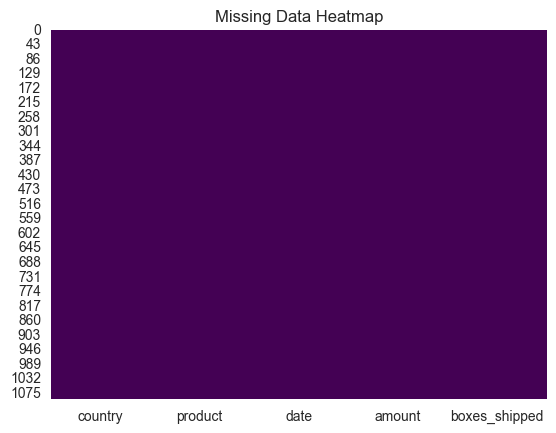

In [22]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
sns.heatmap(df_cleaned.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


No missing values in the df_cleaned dataset.

* Sales Trend Analysis (Time Series Analysis)

---

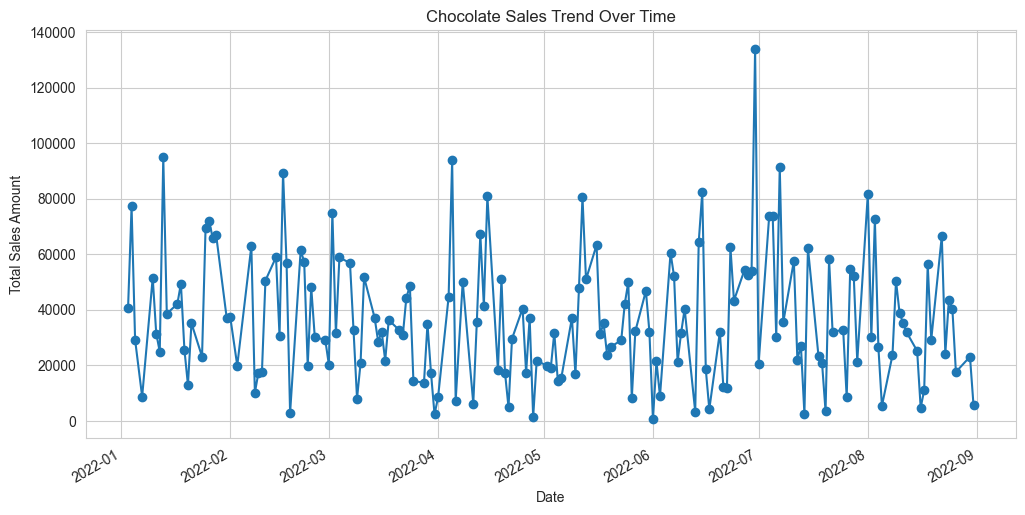

In [23]:
# Convert 'date' to datetime if not already
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

# Group by date and sum the amount
sales_trend = df_cleaned.groupby("date")["amount"].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
sales_trend.plot(marker='o', linestyle='-')
plt.title("Chocolate Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()


# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
